 # Plan
 

### pandas is a Python Data Analysis Library



In [2]:
import pandas as pd

Exemple creation colonne dataFrame

In [14]:
df = pd.DataFrame()
df["maNouvelleColonne"]= ["2015", "2014", "2013"]
df

,maNouvelleColonne
0,2015
1,2014
2,2013


In [38]:
voitures = pd.read_excel("best_selling_models.xlsx", sheetname=["2015", "2014", "2013", "2012", "2011", "2010", "2009", "2008"])
# cree un dictionnaire : les clefs sont les annees
# les colonnes de chaque sheetname deviennent les colonnes de la DataFrame
for year in  range(2008, 2016):
    # Cree une colonne annee 
    voitures[str(year)]["Annee"]= int(year)
#concatene toutes les donnees en une seule DataFrame
voituresConcat = pd.concat(voitures)
voituresConcat


classement                          modele   vente  Annee
2008 0            1                    Renault Clio  152578   2008
     1            2                     Peugeot 207  136283   2008
     2            3                      Citroën C4  121716   2008
     3            4                  Renault Megane  121062   2008
     4            5                     Peugeot 308   82059   2008
     5            6                  Renault Twingo   65333   2008
     6            7                      Citroën C3   60136   2008
     7            8                      Ford Focus   42106   2008
     8            9                 Volkswagen Polo   41491   2008
     9           10                 Volkswagen Golf   41228   2008
     10          11                     Ford Fiesta   38070   2008
     11          12                      Opel Corsa   35373   2008
     12          13                   Renault Modus   35034   2008
     13          14                     Dacia Logan   34095   2008
     14          15                  Renault Laguna   33011   2008
     15          16                     Peugeot 206   31648   2008
     16          17                    Toyota Yaris   30430   2008
     17          18                     Peugeot 107   26758   2008
     18          19                     Peugeot 407   25789   2008
     19          20                      Citroën C5   25697   2008
     20          21                      Citroën C1   25009   2008
     21          22                      Fiat Punto   22759   2008
     22          23                  Renault Kangoo   21501   2008
     23          24                        Fiat 500   21451   2008
     24          25               Volkswagen Passat   19730   2008
     25          26                      Citroën C2   19233   2008
     26          27               Volkswagen Touran   19193   2008
     27          28                       Mini mini   18999   2008
     28          29                      Seat Ibiza   18385   2008
     29          30                  Nissan Qashqai   17861   2008
...             ...                             ...     ...    ...
2015 70          71                     Toyota RAV4    6652   2015
     71          72                      Citroën C5    6459   2015
     72          73                         Audi A4    6303   2015
     73          74                     BMW Serie 3    6176   2015
     74          75                         Ford Ka    6151   2015
     75          76                    Toyota Verso    6128   2015
     76          77                         Kia Rio    6020   2015
     77          78                    Fiat Panda 3    5994   2015
     78          79                    Mercedes CLA    5714   2015
     79          80                     Nissan Note    5671   2015
     80          81                   Volkswagen Up    5580   2015
     81          82                     Citroen DS5    5488   2015
     82          83                   Dacia Logan 2    5395   2015
     83          84                      Opel Astra    5346   2015
     84          85             Citroën C4 Aircross    5301   2015
     85          86                    Hyundai IX35    5197   2015
     86          87                    Smart ForTwo    5160   2015
     87          88                  Renault Trafic    5092   2015
     88          89                      Volvo XC60    5057   2015
     89          90                 Mini Countryman    4941   2015
     90          91                   Ford Ecosport    4808   2015
     91          92   Land Rover Range Rover Evoque    4808   2015
     92          93                         Audi Q5    4737   2015
     93          94                     BMW Serie 4    4724   2015
     94          95                     Opel Meriva    4654   2015
     95          96                     Kia Picanto    4600   2015
     96          97                Renault Laguna 3    4504   2015
     97          98                   Nissan Pulsar    4

In [6]:
voitures_2015.describe()

,classement,vente
count,100.000000,100.00000
mean,50.500000,16863.43000
std,29.011492,19118.99778
min,1.000000,4123.00000
25%,25.750000,6145.25000
50%,50.500000,8973.50000
75%,75.250000,17187.75000
max,100.000000,108408.00000


Formattage de dates


In [30]:
from datetime import datetime


In [32]:
datetime.strptime("2008-May", "%Y-%b")

datetime.datetime(2008, 5, 1, 0, 0)

Liste Comprehension

In [39]:
voituresConcat.Annee = [datetime.strptime(str(year), "%Y") for year in voituresConcat.Annee]


In [40]:
voituresConcat.head()

classement           modele   vente      Annee
2008 0           1     Renault Clio  152578 2008-01-01
     1           2      Peugeot 207  136283 2008-01-01
     2           3       Citroën C4  121716 2008-01-01
     3           4   Renault Megane  121062 2008-01-01
     4           5      Peugeot 308   82059 2008-01-01

Formatage de texte

In [41]:
import unicodedata 


In [49]:
unicodedata.normalize("NFKD", u"téèt").encode("ASCII", "ignore")

'teet'

In [50]:
voituresConcat.modele=[unicodedata.normalize("NFKD", x).encode("ASCII", "ignore") for x in voituresConcat.modele]


In [52]:
voituresConcat.head()
voituresConcat.index=range(len(voituresConcat))

Ventes par année

In [53]:
voituresConcat.head(
)

,classement,modele,vente,Annee
0,1,Renault Clio,152578,2008-01-01
1,2,Peugeot 207,136283,2008-01-01
2,3,Citroen C4,121716,2008-01-01
3,4,Renault Megane,121062,2008-01-01
4,5,Peugeot 308,82059,2008-01-01


In [63]:
ventes_annees = voituresConcat.groupby("Annee", as_index=False).sum()

In [58]:
import matplotlib.pyplot as plt


In [59]:
%matplotlib inline


In [64]:
ventes_annees

,Annee,classement,vente
0,2008-01-01,5050,1917076
1,2009-01-01,5050,2126933
2,2010-01-01,5050,2100289
3,2011-01-01,4950,2032287
4,2012-01-01,5050,1716410
5,2013-01-01,5050,1576037
6,2014-01-01,5050,1586038
7,2015-01-01,5050,1686343


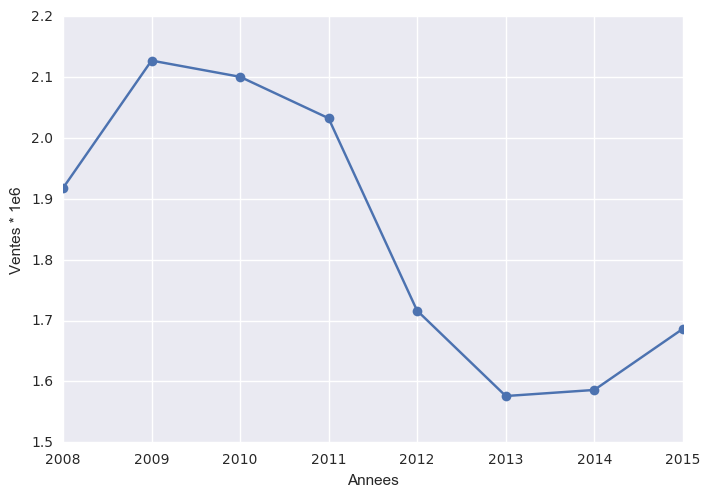

In [74]:
plt.plot(ventes_annees.Annee, ventes_annees.vente/1e6, '-o')
plt.ylabel("Ventes * 1e6")
plt.xlabel("Annees")

plt.show()

In [73]:
import seaborn


In [2]:
text = "Misérables"
import unicodedata

In [4]:
unicodedata.normalize("NFKD",  unicode(text, "utf-8")).encode("ASCII", "ignore")


'Miserables'

crise financiere 2012